In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

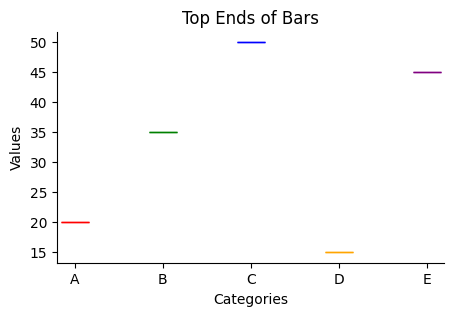

In [2]:
# Создание данных для примера
categories = ['A', 'B', 'C', 'D', 'E']
values = [20, 35, 50, 15, 45]

# Создание графика только с верхними концами столбцов
plt.figure(figsize=(5, 3))

# Задаем цвета для черточек
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Отображение верхних концов столбцов с заданными цветами и стилем черточки
for i, val in enumerate(values):
    plt.plot([i, i], [val, val], marker='_', markersize=20, color=colors[i], linestyle='-', linewidth=3)

# Настройка осей и меток
plt.xticks(range(len(categories)), categories)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Top Ends of Bars')

# Удаление сетки
plt.grid(False)

# Удаление осей сверху и справа
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

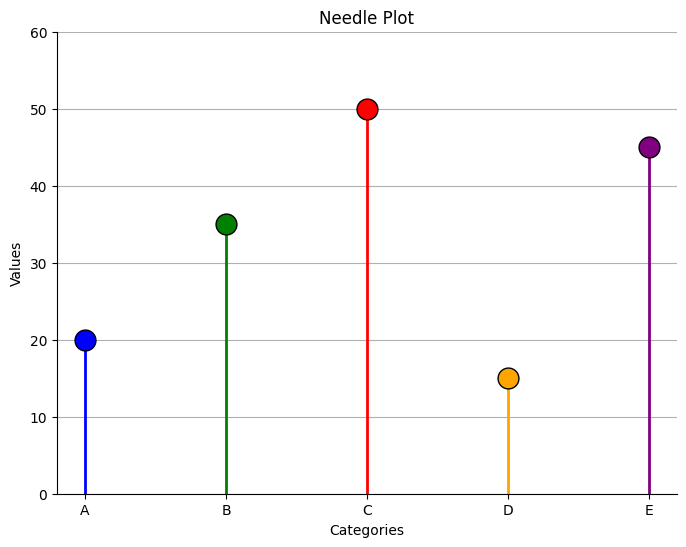

In [3]:
# Создание DataFrame
data = {'categories': ['A', 'B', 'C', 'D', 'E'],
        'values': [20, 35, 50, 15, 45]}

df = pd.DataFrame(data)

# Создание графика "Needle Plot" из DataFrame
plt.figure(figsize=(8, 6))

# Отображение черточек (верхних концов столбцов) и точек на концах
for i, row in df.iterrows():
    colors = ['blue', 'green', 'red', 'orange', 'purple'][i]
    plt.plot([i, i], [0, row['values']], color=colors, linewidth=2)
    plt.plot(i, row['values'], marker='o', markersize=15,
             color=colors, markeredgecolor='black', markeredgewidth=1)

# Настройка осей и меток
plt.xticks(range(len(df)), df['categories'])
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Needle Plot')

# Добавление сетки только для оси y
plt.grid(axis='y')

# Установка предела для оси y
plt.ylim(0, df['values'].max() + 10)

# Удаление осей сверху и справа
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

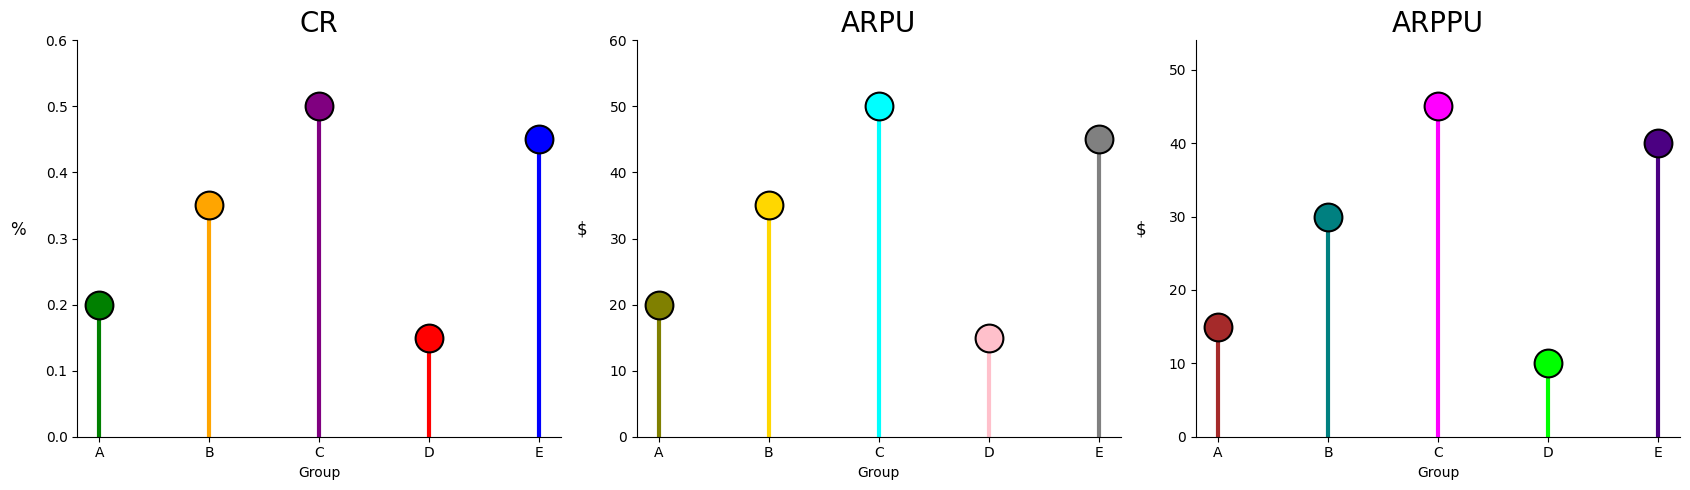

In [4]:
def graphics(data):
    """
    Создает три графика столбчатых диаграмм для трех метрик:
    1. График CR
    2. График ARPU
    3. График ARPPU

    Параметры:
        data (pandas.core.frame.DataFrame):
            DataFrame с данными для построения графиков.
    """
    fig, axes = plt.subplots(1, 3, figsize=(17, 5))
    palette = [['green', 'orange', 'purple', 'red', 'blue'],
               ['olive', 'gold', 'cyan', 'pink', 'gray'],
               ['brown', 'teal', 'magenta', 'lime', 'indigo']]
    
    for i, metric in enumerate(['CR', 'ARPU', 'ARPPU']):
        ax = axes[i]
        
        ax.set_title(metric, fontsize=20)
        ax.set_ylabel('$' if metric != 'CR' else '%', fontsize='large', rotation='horizontal', labelpad=20)
        ax.set_xlabel('Group')
        ax.set_xticks(range(len(data['Group'])))
        ax.set_xticklabels(data['Group'], rotation=0)  # Используем названия групп из датафрейма

        # Добавление черточек и точек на концах
        for j, val in enumerate(data[metric]):
            ax.plot([j, j], [0, val], color=palette[i][j], linewidth=3)
            ax.plot(j, val, marker='o',
                    markersize=20, color=palette[i][j], markeredgecolor='black', markeredgewidth=1.5)

        # Установка индивидуального предела для оси y
        ax.set_ylim(0, max(data[metric]) + max(data[metric]) * 0.2)  # Добавляем 20% от максимального значения
        
        # Удаление осей сверху и справа
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Создание DataFrame
data = {'Group': ['A', 'B', 'C', 'D', 'E'],
        'CR': [0.2, 0.35, 0.5, 0.15, 0.45],
        'ARPU': [20, 35, 50, 15, 45],
        'ARPPU': [15, 30, 45, 10, 40]}

df = pd.DataFrame(data)

# Построение графиков "Needle Plot" с индивидуальными шкалами измерений с помощью новой функции
graphics(df)